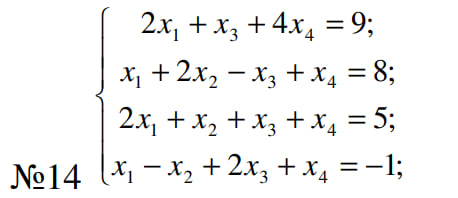

## <b><span style='color:#F1C40F'>|</span> імпортуємо бібліотеки </b>

In [1]:
import math
import numpy as np

## <b><span style='color:#F1C40F'>|</span> метод Крамера </b>

### <b><span style='color:#F1C40F'>|</span> Реалізація метода </b>

In [2]:
# Функція для обчислення детермінанту матриці
def determinantOfMatrix(mat):
    ans = 0
    n = len(mat)

    # Перевірка, чи матриця є квадратною
    if n != len(mat[0]): 
        raise ValueError("Матриця має бути квадратною")

    # Детермінант одного елемента - цей елемент
    if n == 1:  
        return mat[0][0]

    # Рекурсивно обчислюємо детермінант за допомогою розкладу по першому рядку
    for i in range(n):
        cofactor = []
        for j in range(1, n):
            row = []
            for k in range(n):
                if k != i:
                    row.append(mat[j][k])
            cofactor.append(row)
        ans += mat[0][i] * ((-1) ** i) * determinantOfMatrix(cofactor)

    return ans

# Функція для пошуку розв'язку системи рівнянь за методом Крамера
def findSolution(coeff):

    D = []  # для зберігання матриць

    for i in range(5):
        d = []
        for j in range(4):
            if i == 0:
                # матриця D
                d.append([coeff[j][k] for k in range(4)]) 
            else:
                # матриці D1-D4
                d.append([coeff[j][k] if k != i-1 else coeff[j][4] for k in range(4)])  
        D.append(d)

    # Обчислення детермінантів кожної з матриць
    determinants = [determinantOfMatrix(matrix) for matrix in D]

    # Виведення результатів
    print("D:", determinants[0])
    for i in range(1, 5):
        print(f"D_{i}:", determinants[i])

    # Розв'язання системи рівнянь, якщо детермінант головної матриці не рівний нулю
    if determinants[0] != 0:
        solutions = [determinants[i] / determinants[0] for i in range(1, 5)]
        print("Значення x, y, z, w:", solutions)
    else:
        # Перевірка на наявність розв'язків
        if all(d == 0 for d in determinants[1:]):
            print("Нескінченно багато розв'язків")
        else:
            print("Немає розв'язків")

### <b><span style='color:#F1C40F'>|</span> Приклад використання функції </b>

In [3]:
matrix = [[2, 0, 1, 4, 9],
        [1, 2, -1, 1, 8],
        [2, 1, 1, 1, 5],
        [1, -1, 2, 1, -1]]

findSolution(matrix)

D: 3
D_1: 3
D_2: 6
D_3: -3
D_4: 6
Значення x, y, z, w: [1.0, 2.0, -1.0, 2.0]


## <b><span style='color:#F1C40F'>|</span> метод Гауса </b>

In [4]:
N = 4  # Розмірність матриці (N x N+1)

def gaussianElimination(mat):

	# Здійснення редукції до рядково-еквівалентної форми
	singular_flag = forwardElim(mat)

	# якщо матриця є виродженою
	if (singular_flag != -1):

		print("Вироджена матриця.")

		# якщо права частина рівняння, що відповідає нульовому рядку, дорівнює 0, * система має нескінченно багато рішень, інакше вона несумісна
		if (mat[singular_flag][N]):
			print("Несумісна система.")
		else:
			print("Можливо, нескінченна кількість рішень.")

		return

	# отримання розв'язку системи та виведення його за допомогою оберненої підстановки
	backSub(mat)

# Функція для обміну двома рядками
def swap_row(mat, i, j):

	for k in range(N + 1):

		temp = mat[i][k]
		mat[i][k] = mat[j][k]
		mat[j][k] = temp

# Функція для редукції матриці до рядково-еквівалентної форми
def forwardElim(mat):
	for k in range(N):
	
		# Ініціалізація максимального значення та індексу для опорного елемента
		i_max = k
		v_max = mat[i_max][k]

		# Знаходження більшої амплітуди для опорного елемента, якщо така є
		for i in range(k + 1, N):
			if (abs(mat[i][k]) > v_max):
				v_max = mat[i][k]
				i_max = i

		# якщо головний діагональний елемент дорівнює нулю,
		# це вказує на те, що матриця є вироджена, і
		# призведе до ділення на нуль пізніше.
		if not mat[k][i_max]:
			return k # Матриця є вироджена

		# Обміняти рядок з найбільшим значенням з поточним рядком
		if (i_max != k):
			swap_row(mat, k, i_max)

		for i in range(k + 1, N):

			# фактор f для встановлення поточного елементу k-го рядка на 0,
			# і подальшої зміни к-го стовпця на 0
			f = mat[i][k]/mat[k][k]

			# відняти f-кратний відповідний k-й
			# елемент рядка
			for j in range(k + 1, N + 1):
				mat[i][j] -= mat[k][j]*f

			# заповнення нижньотрикутникової матриці нулями
			mat[i][k] = 0

		# print(mat)

	# print(mat)
	return -1

# Функція для обчислення значень невідомих
def backSub(mat):

	x = [None for _ in range(N)] # Масив для зберігання розв'язку

	# Початок обчислень з останнього рівняння до першого
	for i in range(N-1, -1, -1):

		# почати з правої частини рівняння
		x[i] = mat[i][N]

		# Ініціалізація j від i+1, оскільки матриця верхньотрикутникова
		for j in range(i + 1, N):
		
			# відняти всі ліві значення
			# крім коефіцієнта змінної
			# значення якої обчислюється
			x[i] -= mat[i][j]*x[j]

		# поділити праву частину на коефіцієнт невідомої
		x[i] = (x[i]/mat[i][i])

	print("\nРозв'язок системи:")
	for i in range(N):
		print("{:.8f}".format(x[i]))

### <b><span style='color:#F1C40F'>|</span> Приклад використання функції </b>

In [5]:
matrix = [[2, 0, 1, 4, 9],
        [1, 2, -1, 1, 8],
        [2, 1, 1, 1, 5],
        [1, -1, 2, 1, -1]]
gaussianElimination(matrix)


Розв'язок системи:
1.00000000
2.00000000
-1.00000000
2.00000000


## <b><span style='color:#F1C40F'>|</span> метод Жордано-Гауса </b>

In [6]:
M = 10  # Розмірність матриці (M x M+1)

# Функція для виведення матриці
def PrintMatrix(a, n):
	for i in range(n):
		print(*a[i])

# Функція для здійснення операцій над матрицею з метою редукції до розширеної ступеневої форми.
def PerformOperation(a, n):
	i = 0
	j = 0
	k = 0
	c = 0
	flag = 0

	# Виконання елементарних операцій
	for i in range(n):
		if (a[i][i] == 0):

			c = 1
			while ((i + c) < n and a[i + c][i] == 0):
				c += 1
			if ((i + c) == n):

				flag = 1
				break

			j = i
			for k in range(1 + n):

				temp = a[j][k]
				a[j][k] = a[j+c][k]
				a[j+c][k] = temp

		for j in range(n):

			# Виключення всіх i == j
			if (i != j):
				# Перетворення матриці до розширеної ступеневої форми (діагональної матриці)
				p = a[j][i] / a[i][i]

				k = 0
				for k in range(n + 1):
					a[j][k] = a[j][k] - (a[i][k]) * p

	return flag

import math

# Функція для виведення результату з округленням
def PrintResult(a, n, flag):

    print("Результат: ")

    if (flag == 2):
        print("Нескінченні рішення існують")
    elif (flag == 3):
        print("Рішення не існує")

    # Виведення розв'язку з перевіркою близькості до цілого числа
    else:
        for i in range(n):
            if math.isclose(a[i][n] / a[i][i], round(a[i][n] / a[i][i])):
                print(round(a[i][n] / a[i][i]), end=" ")
            else:
                print(a[i][n] / a[i][i], end=" ")


# Перевірка, чи існують нескінченно багато рішень чи немає розв'язку
def CheckConsistency(a, n, flag):

	# flag == 2 для нескінченно багатьох рішень
	# flag == 3 для відсутності розв'язку
	flag = 3
	for i in range(n):
		sum = 0
		for j in range(n):
			sum = sum + a[i][j]
		if (sum == a[i][j]):
			flag = 2

	return flag

In [7]:
# Функція для виведення результату з округленням
def PrintResult(a, n, flag):

    print("Результат: ")

    if (flag == 2):
        print("Нескінченні рішення існують")
    elif (flag == 3):
        print("Рішення не існує")

    # Виведення розв'язку з перевіркою близькості до цілого числа
    else:
        for i in range(n):
            if math.isclose(a[i][n] / a[i][i], round(a[i][n] / a[i][i])):
                print(round(a[i][n] / a[i][i]), end=" ")
            else:
                print(a[i][n] / a[i][i], end=" ")


### <b><span style='color:#F1C40F'>|</span> Приклад використання функції </b>

In [8]:
matrix = [[2, 0, 1, 4, 9],
        [1, 2, -1, 1, 8],
        [2, 1, 1, 1, 5],
        [1, -1, 2, 1, -1]]
N = 4
flag = 0

flag = PerformOperation(matrix, N)

if (flag == 1):
	flag = CheckConsistency(matrix, N, flag)

print("Остаточна розширена матриця: ")
PrintMatrix(matrix, N)
print()

PrintResult(matrix, N, flag)

Остаточна розширена матриця: 
2.0 0.0 0.0 0.0 1.9999999999999982
0.0 2.0 0.0 0.0 4.0
0.0 0.0 0.75 0.0 -0.75
0.0 0.0 0.0 1.0 2.0

Результат: 
1 2 -1 2 

## <b><span style='color:#F1C40F'>|</span> метод оберненої матриці </b>

In [9]:
A = np.array([[2, 0, 1, 4],
        [1, 2, -1, 1],
        [2, 1, 1, 1],
        [1, -1, 2, 1]])
b = np.array([9,8,5,-1])

In [10]:
# Перевірка, чи матриця коефіцієнтів є квадратною (оборотною)
if A.shape[0] != A.shape[1]:
  raise ValueError("Матриця коефіцієнтів повинна бути квадратною для оборотності")

# Спроба знайти обернену матрицю та розв'язати систему
try:
  # Обчислення оберненої матриці A
  A_inv = np.linalg.inv(A)

  # Розв'язання системи: X = A_inv * b
  X = A_inv.dot(b)

  print("Результат:")
  print(X)
except np.linalg.LinAlgError:
  print("Помилка: Сингулярна матриця. Унікальний розв'язок не існує.")

Результат:
[ 1.  2. -1.  2.]
